# <center> Кейс: Анализ оттока клиентов банка

In [1]:
import pandas as pd
import plotly.express as px
import plotly.figure_factory as ff

In [2]:
churn_data = pd.read_csv('data/churn.csv')

In [3]:
churn_df = churn_data.copy() # сохраняя оригинальный датасет скопировав датафрейм
churn_df = churn_df.drop('RowNumber', axis=1) # Удаляем столбец не несущий информации
churn_df.head()

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


9.1. Каково соотношение ушедших и лояльных клиентов? Покажите это на графике и дайте комментарий по соотношению.

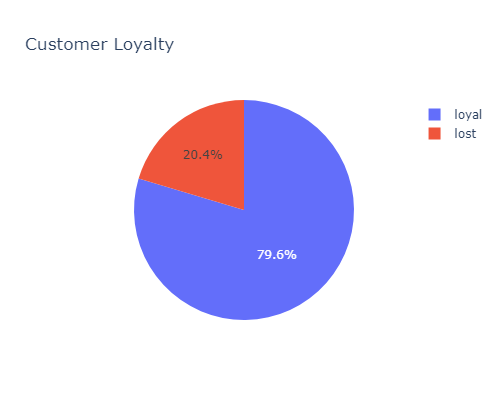

In [4]:
loyalty = churn_data.Exited.value_counts()

fig = px.pie(names=['loyal', 'lost'],
             values=loyalty,
             title='Customer Loyalty',
             width=500,
             height=400,
)
fig.write_image('data/loyalty.png')
fig.show('png')

- можно утверждать, что примерно каждый пятый клиент прекратил пользоватся услугами банка

9.2. Постройте график, показывающий распределение баланса пользователей, у которых на счету больше 2 500 долларов.
Опишите распределение и сделайте выводы

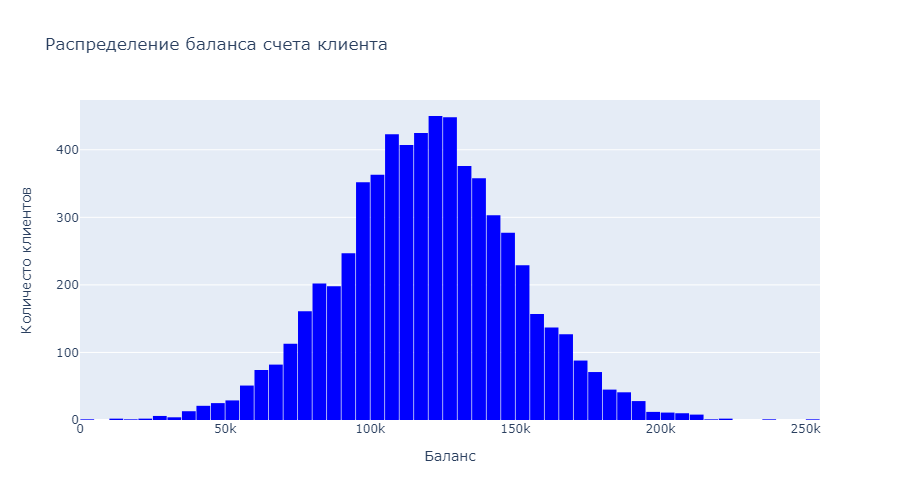

In [5]:
clients_above_2500 = churn_data[churn_data.Balance > 2500] # фильтруем клиентов с балансом больше 2500

fig = px.histogram(clients_above_2500,
                   x='Balance',
                   color_discrete_sequence=['blue'],
                   title='Распределение баланса счета клиента',
                   nbins=100,
                   width=900,
                   height=500                  
)
fig.layout.yaxis.title.text = 'Количесто клиентов'
fig.layout.xaxis.title.text = 'Баланс'
fig.layout.bargap = 0.05
fig.write_image('data/balance.png')
fig.show('png')

- можно утверждать, что распределение балансов похоже на нормальное
- основная часть клиентов имеет на своих счетах сумму от 50 до 180 тысяч
- мода распределения составляет 120-130 тысяч

9.3. Посмотрите на распределение баланса клиента в разрезе признака оттока. Как различаются суммы на накопительном счёте ушедших и лояльных клиентов? 
Подумайте и напишите, с чем это может быть связано, что может не устраивать ушедших клиентов в банке.

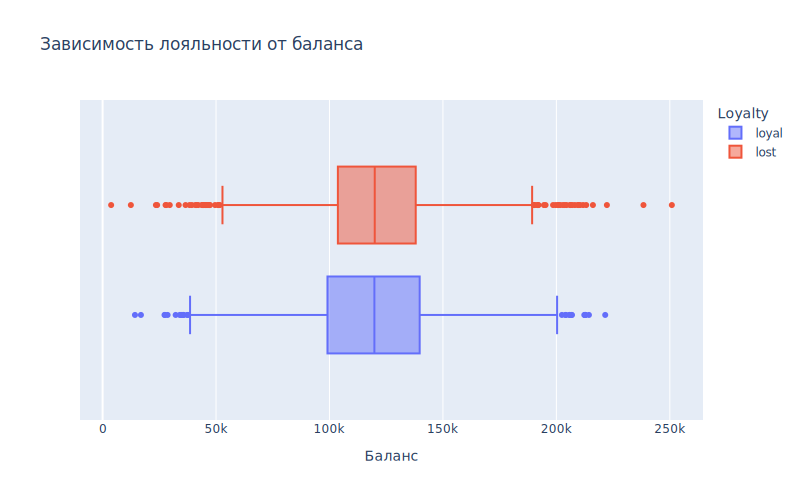

In [6]:
clients_above_2500_loaylty = clients_above_2500.copy() # создаем новый датавфрейм 
clients_above_2500_loaylty['Loyalty'] = clients_above_2500_loaylty.Exited.apply(lambda x: 'loyal' if x==0 else 'lost') # создаем колонку-индикатор лояльности клиента

fig = px.box(clients_above_2500_loaylty, 
             x='Balance',
             color='Loyalty',
             title='Зависимость лояльности от баланса',
             width=800,
             height=500
)
fig.layout.xaxis.title.text = 'Баланс'
fig.write_image('data/loyalty_balance.png')
fig.show('svg')

- можно сказать, медианные значения распределений практически не отличаются
- распределение ушедших клиентов более узкое по сравнению с распределением лояльных
- можно предположить, что уход клиентов имеющих на счете баланс близкий к медианному, \
которых условно можно назвать "средним", связан с тем, конкурнекты нашего банка предлагают более выгодные условия для подобных счетов
- интересно отметить, что аномальные выбросы у ушедших клиентов расположены шире, чем у лояльных

9.4. Посмотрите на распределение возраста в разрезе признака оттока. В какой группе больше потенциальных выбросов?\
 На какую возрастную категорию клиентов стоит обратить внимание банку?

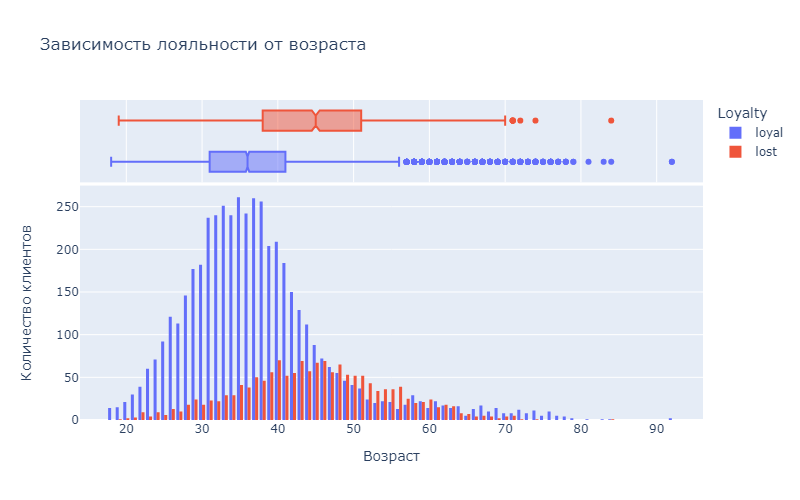

In [7]:
fig = px.histogram(clients_above_2500_loaylty,
                   x='Age',
                   title='Зависимость лояльности от возраста',
                   color='Loyalty',
                   barmode='group',
                   marginal='box',
                   nbins=100,
                   width=800,
                   height=500                  
)
fig.layout.yaxis.title.text = 'Количество клиентов'
fig.layout.xaxis.title.text = 'Возраст'
fig.write_image('data/loyalty_age.png')
fig.show('png')

- наблюдаются значительные возрастные отличия между группами лояльных и нелояльных клиентов. \
 Мода распределения лояльных клиентов банка составляют люди в возрасте 30-40 лет. \
 Эта возрастная категория формирует наиболее многочисленную группу надежных клиентов
- чаще всего уходять клиенты в возрастной категории от 40 до 50 лет

9.5. Постройте график, который показывает взаимосвязь кредитного рейтинга клиента и его предполагаемой зарплаты. Добавьте расцветку по признаку оттока клиентов. Какова взаимосвязь между признаками? Если не видите явной взаимосвязи, укажите это.

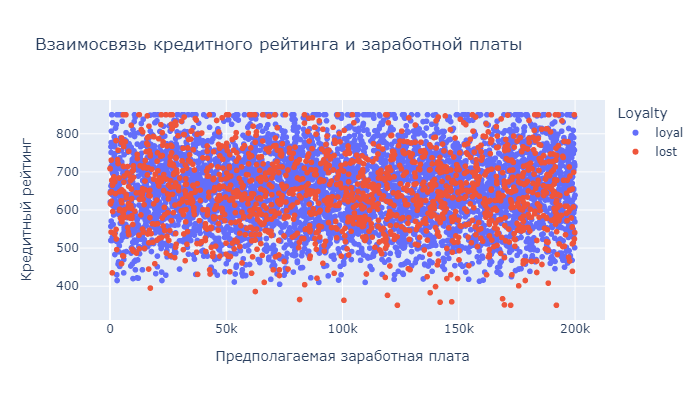

In [8]:
fig = px.scatter(clients_above_2500_loaylty,
                 x='EstimatedSalary',
                 y='CreditScore',
                 color='Loyalty',
                 labels={'EstimatedSalary': 'Предполагаемая заработная плата', 'CreditScore': 'Кредитный рейтинг'},
                 title='Взаимосвязь кредитного рейтинга и заработной платы',
                 height=400                
)
fig.write_image('data/scores.png')
fig.show('png')

- интересно отметить, что все клиенты с кредитным рейтингом менее 400 покинули банк.
- в целом можно утверждать, что закономерности между признаками не наблюдается

9.6. Кто чаще уходит, мужчины или женщины? Постройте график, который иллюстрирует это.

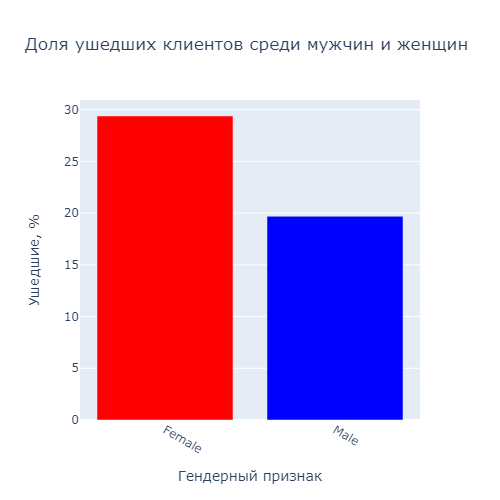

In [9]:
by_gender = clients_above_2500_loaylty.groupby('Gender', as_index=False).Exited.mean() # группируем по гендерному признаку
by_gender['Exited'] = by_gender.Exited * 100

fig = px.bar(by_gender,
             x='Gender',
             y='Exited',
             color='Gender',
             color_discrete_map={'Female': 'Red', 'Male': 'Blue'},
             labels={'Exited': 'Ушедшие, %', 'Gender' : 'Гендерный признак'},
                        title=' Доля ушедших клиентов среди мужчин и женщин',
             width=500,
             height=500 
)
fig.update_layout(showlegend=False)
fig.update_xaxes(tickangle=30)
fig.write_image('data/gender.png')
fig.show('png')

- можно сказать, что женщины гораздо чаще покидают банк: 30% процентов женщин-клиентов ушли из банка, \
против 20% ушедших клиентов-мужчин

9.7. Как отток клиентов зависит от числа приобретённых у банка услуг? Для ответа на этот вопрос постройте многоуровневую столбчатую диаграмму.

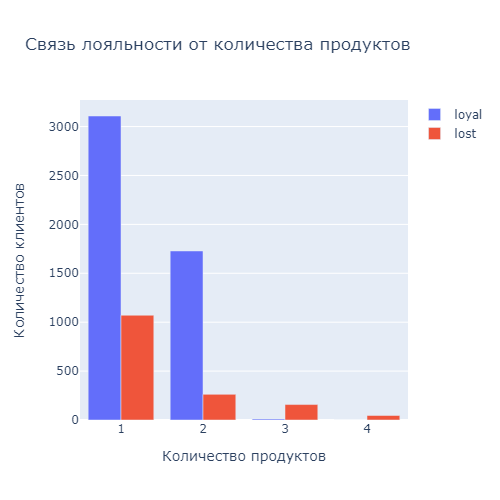

In [10]:
products_groups = clients_above_2500.groupby('NumOfProducts')['Exited'].agg(['sum', 'count']).reset_index()
products_groups.rename(columns={'sum': 'lost'}, inplace=True)
products_groups['loyal'] = products_groups['count'] - products_groups['lost']
products_groups.drop('count', axis=1, inplace=True)

fig = px.bar(products_groups, 
             x="NumOfProducts", 
             y=["loyal", "lost"],
             barmode='group',
             title='Связь лояльности от количества продуктов',
             width=500,
             height=500
)
fig.layout.xaxis.title = 'Количество продуктов'
fig.layout.yaxis.title = 'Количество клиентов'
fig.layout.legend.title = None
fig.write_image('data/products.png')
fig.show('png')

- больше всего клиентов как лояльных, так и ушедших приобрело один продукт
- доля ушедших клиентов меньше всего  в группе клиентов приобретших два продукта т.е. около 13% против 25% ушедших клиентов в первой группе.
- почти все клиенты, которые приобрели 3 или 4 услуги, ушли из банка банк, у этих категорий относительный отток максимальный, близок к 100%, однако общее количество  клиентов не велико.

9.8. Как влияет наличие статуса активного клиента на отток клиентов? Постройте диаграмму, иллюстрирующую это. Что бы вы предложили банку, чтобы уменьшить отток клиентов среди неактивных?

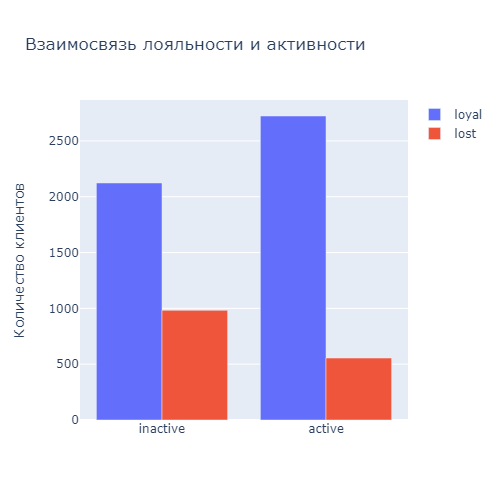

In [11]:
by_activity = clients_above_2500.groupby('IsActiveMember')['Exited'].agg(['sum', 'count']).reset_index()
by_activity.rename(columns={'sum': 'lost'}, inplace=True)
by_activity['loyal'] = by_activity['count'] - by_activity['lost']
by_activity.drop('count', axis=1, inplace=True)
by_activity.loc[0, 'IsActiveMember'] = 'inactive'
by_activity.loc[1, 'IsActiveMember'] = 'active'

fig = px.bar(by_activity, 
             x="IsActiveMember", 
             y=["loyal", "lost"],
             barmode='group',
             title='Взаимосвязь лояльности и активности',
             width=500,
             height=500
)
fig.layout.xaxis.title = None
fig.layout.yaxis.title = 'Количество клиентов'
fig.layout.legend.title = None
fig.write_image('data/activity.png')
fig.show('png')

- можно утверждать, что колиечство ушедших клиентов среди неактивных клиентов значительно больше, чем среди активных.\
Доля ушедших среди неактивных клиентов составляет более 30%, против 15 % у активных клиентов. То есть разница составляет в два раза.
- для сохранения клиентов можно предложить банку стимулировать клиентов к переходу в разряд активных.\
 Это можно сделать за счет предоставления 
различных бонусов за операции по карте: кэшбэки, процент на остаток по счету,\
 скидки на приобретение услуг у партнеров банка

9.9. В какой стране доля ушедших клиентов больше? Постройте тепловую картограмму, которая покажет это соотношение на карте мира. Предположите, с чем это может быть связано

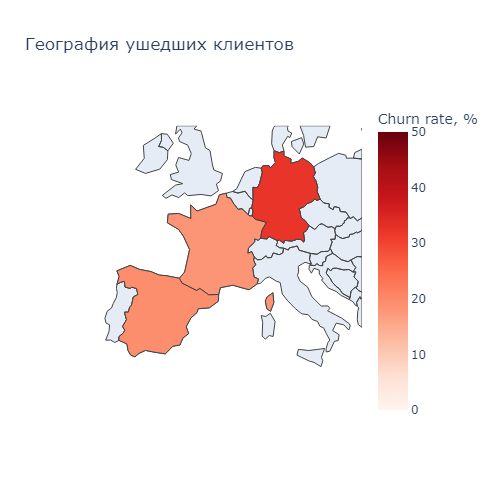

In [12]:
by_country = clients_above_2500.groupby('Geography', as_index=False)['Exited'].mean()
by_country['Churn rate, %'] = by_country['Exited'] * 100

fig = px.choropleth(
    data_frame=by_country, 
    locations="Geography", 
    locationmode = "country names", 
    color="Churn rate, %", 
    range_color=[0, 50],
    title='География ушедших клиентов', 
    scope='europe',
    fitbounds='locations',
    width=500, 
    height=500,
    color_continuous_scale='Reds'
)
fig.write_image('data/countries.png')
fig.show('png')

- наибольший отток клиентов в Германии и составляет более 30%
- вероятной причиной болшего оотока клиентов в Германии может быть появление в Германии  привлекательного национального банка,\
 предлагающего более подходящие решения непосредственно для граждан Германии


9.10. Переведите числовой признак CreditScore в категориальный. Для этого воспользуйтесь функцией get_credit_score_cat(), которая приведена ниже.\
 Примените её к столбцу CreditScore и создайте новый признак CreditScoreCat — категории кредитного рейтинга.

 
Постройте сводную таблицу, строками которой являются категории кредитного рейтинга (CreditScoreCat), а столбцами — количество лет, в течение которых клиент пользуется услугами банка (Tenure). В ячейках сводной таблицы должно находиться среднее по признаку оттока (Exited) — доля ушедших пользователей.

На основе полученной сводной таблицы постройте тепловую карту с аннотацией. Найдите на тепловой карте категории клиентов, которые уходят чаще всего.

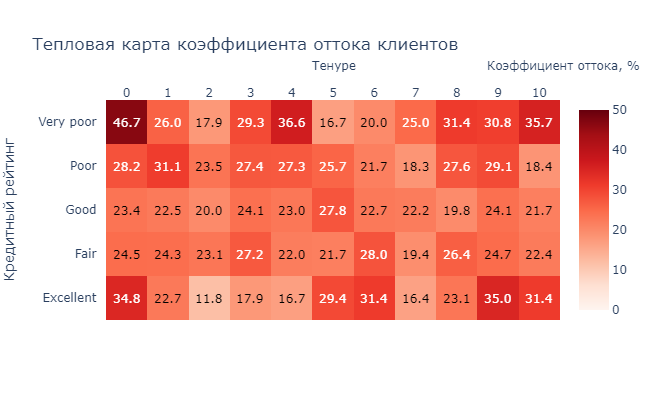

In [13]:
def get_credit_score_cat(credit_score):
    if credit_score >= 300 and credit_score < 500:
        return "Very poor"
    elif credit_score >= 500 and credit_score < 601:
        return "Poor"
    elif credit_score >= 601 and credit_score < 661:
        return "Fair"
    elif credit_score >= 661 and credit_score < 781:
        return "Good"
    elif credit_score >= 781 and credit_score < 851:
        return "Excellent"
    elif credit_score >= 851:
        return "Top"
    elif credit_score < 300:
        return "Deep"
    

clients_above_2500['CreditScoreCat'] = clients_above_2500['CreditScore'].apply(get_credit_score_cat)
score_and_tenure = pd.pivot_table(
    clients_above_2500,
    values='Exited',
    index='CreditScoreCat',
    columns='Tenure',
    aggfunc='mean'                             
)
score_and_tenure = (score_and_tenure * 100).round(1)

fig = ff.create_annotated_heatmap(
    z=score_and_tenure.to_numpy(),
    x=score_and_tenure.columns.tolist(),
    y=score_and_tenure.index.tolist(), 
    colorscale='Reds',
    zmin=0, zmax=50,
    showscale=True   
)
fig.add_annotation(x=1.18,
                   y=1.2,
                   showarrow=False,
                   text="Коэффициент оттока, %",
                   xref="paper",
                   yref="paper"
)
fig.add_annotation(x=0.5,
                   y=1.2,
                   showarrow=False,
                   text="Тенуре",
                   xref="paper",
                   yref="paper"
)
fig.update_layout(width=647, height=400)
fig.layout.yaxis.title = 'Кредитный рейтинг'
fig.layout.title = 'Тепловая карта коэффициента оттока клиентов'
fig.write_image('data/churn_heatmap.png')
fig.show('png')

- самый большой отток (более 45%) у клиентов с очень плохим кредитным рейтингом и минимальным стажем пользования услугами банка (менее года)
- вторая категория по оттоку (в районе 36%) являются клиенты со стажем 4 года и 10 лет
- что интересно сравнимый отток (в районе 35%) наблюдается и у клиентов с отличным рейтингом и стажем менее года и 9-10 лет
- для средних рейтингов отток клиентов стабилен по всем годам и редко превышет 30 %